# <b>■ 7장. 파이썬을 이용한 머신러닝</b>
    1. kNN 머신러닝 알고리즘으로 타이타닉 생존자를 예측하는 모델을 생성

## <b>■ 정확도를 바로 출력하는 함수</b>
```python
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_hat)
accuracy
```

### ※ 문제220. 어제 seaborn의 타이타닉 kNN 모델을 생성하는 코드 맨 아래에 위의 코드를 추가해서 정확도가 나오는지 확인해보시오

In [9]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset('titanic')
n_df = pd.read_csv('train.csv')
df = pd.concat([df,n_df['Name']],axis=1)
appel = df['Name'].str.split(',').str[1].str.split('.')
df['title'] = appel.str.get(0)

age_m = pd.DataFrame(round(df.groupby('title')['age'].mean(),1))
df = pd.merge(df, age_m, on='title',how='left')
df.age_x.fillna(df.age_y, inplace=True)

rdf = df.drop(['embark_town','deck','age_y'],axis=1)
rdf.columns.values

array(['survived', 'pclass', 'sex', 'age_x', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'alive', 'alone', 'Name',
       'title'], dtype=object)

In [11]:
ndf = rdf[['survived','pclass','sex','age_x','sibsp','parch','embarked']]
ndf.rename(columns = {'age_x' : 'age'}, inplace = True)

gender = pd.get_dummies(ndf.sex)
ndf = pd.concat([ndf, gender],axis=1)

oh_embarked = pd.get_dummies(ndf.embarked, prefix='town')
ndf = pd.concat([ndf, oh_embarked], axis=1)
ndf = ndf.drop(['embarked','sex'],axis=1,)

X = ndf[['pclass','age','sibsp','parch','female','male','town_C','town_Q','town_S']]
y = ndf.survived

from sklearn import preprocessing as ppc
X = ppc.StandardScaler().fit(X).transform(X)
X

from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3, random_state=4)

from sklearn.neighbors import KNeighborsClassifier as knc
knn = knc(n_neighbors=13)
knn.fit(X_train, y_train)

y_hat = knn.predict(X_test)

from sklearn import metrics
knn_matrix = metrics.confusion_matrix(y_test, y_hat)
print(knn_matrix)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score( y_test, y_hat)
print(accuracy)

[[170   8]
 [ 28  62]]
0.8656716417910447


C:\Users\knitwill\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### ※ 문제221. 나이의 결측치를 나이의 최빈값으로 치환하고 학습시켜서 정확도를 확인하시오

In [67]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset('titanic')
n_df = pd.read_csv('train.csv')
df = pd.concat([df,n_df['Name']],axis=1)
appel = df['Name'].str.split(',').str[1].str.split('.')
df['title'] = appel.str.get(0)

# age_m = pd.DataFrame(round(df.groupby('title')['age'].mean(),1))
# df = pd.merge(df, age_m, on='title',how='left')

rdf = df.drop(['embark_town','deck'],axis=1)
rdf

rdf['age'].fillna(rdf['age'].value_counts(dropna=True).idxmax(), inplace=True) # 최빈값으로 치환
rdf['embarked'].fillna(rdf['embarked'].value_counts(dropna=True).idxmax() , inplace=True ) 

rdf.columns.values

ndf = rdf[['survived','pclass','sex','age','sibsp','parch','embarked']]

gender = pd.get_dummies(ndf.sex)
ndf = pd.concat([ndf, gender],axis=1)

oh_embarked = pd.get_dummies(ndf.embarked, prefix='town')
ndf = pd.concat([ndf, oh_embarked], axis=1)
ndf = ndf.drop(['embarked','sex'],axis=1,)

X = ndf[['pclass','age','sibsp','parch','female','male','town_C','town_Q','town_S']]
y = ndf.survived

from sklearn import preprocessing as ppc
X = ppc.StandardScaler().fit(X).transform(X)
X

from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3, random_state=4)

from sklearn.neighbors import KNeighborsClassifier as knc
knn = knc(n_neighbors=13)
knn.fit(X_train, y_train)

y_hat = knn.predict(X_test)

from sklearn import metrics
knn_matrix = metrics.confusion_matrix(y_test, y_hat)
print(knn_matrix)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score( y_test, y_hat)
print(accuracy)

[[166  12]
 [ 29  61]]
0.8470149253731343


### ※ 문제222. 지금 현재 타이타닉 데이터프레임의 결측치가 어느 컬럼에 있는지 확인하시오

In [10]:
ndf.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
female      0
male        0
town_C      0
town_Q      0
town_S      0
dtype: int64

### ※ 문제222. 위의 코드에 데이터만 변경해서 kNN 모델을 생성하시오. 
    R 머신러닝 때 kNN 알고리즘 배울때 사용했던 유방암 데이터로 모델을 생성하시오
    wisc_bc_data.csv
    Wisconsin Hospital 데이터
    유방암 종양의 크기와 지름, 거칠기 등에 대한 수치 데이터이며 라벨 컬럼은 diagnosis이고 B가 양성, M이 악성

In [13]:
import pandas as pd
df = pd.read_csv('wisc_bc_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 569 non-null    int64  
 1   diagnosis          569 non-null    object 
 2   radius_mean        569 non-null    float64
 3   texture_mean       569 non-null    float64
 4   perimeter_mean     569 non-null    float64
 5   area_mean          569 non-null    float64
 6   smoothness_mean    569 non-null    float64
 7   compactness_mean   569 non-null    float64
 8   concavity_mean     569 non-null    float64
 9   points_mean        569 non-null    float64
 10  symmetry_mean      569 non-null    float64
 11  dimension_mean     569 non-null    float64
 12  radius_se          569 non-null    float64
 13  texture_se         569 non-null    float64
 14  perimeter_se       569 non-null    float64
 15  area_se            569 non-null    float64
 16  smoothness_se      569 non

### <b>■ 머신러닝 모델 훈련 및 예측 순서</b>
    1. 데이터프레임 생성
    2. 결측치 확인 및 처리
    3. 범주형 데이터를 수치형 데이터로 변경
    4. 정규화 또는 표준화
    5. 훈련 데이터와 테스트 분리
    6. 모델 훈련
    7. 예측
    8. 모델 평가

In [41]:
# 1. 데이터프레임 생성
import pandas as pd
df = pd.read_csv('wisc_bc_data.csv')

# 2. 결측치 확인 및 처리
df.isnull().sum()

# 3. 범주형 데이터를 수치형 데이터로 변경
diag = pd.get_dummies(df.diagnosis, prefix='diag')
df = pd.concat([df, diag],axis=1)

rdf = df.drop(['diagnosis','diag_B'],axis=1)

# 4. 정규화 또는 표준화
y = df.diag_M
X = rdf.drop('diag_M',axis=1)

from sklearn import preprocessing as ppc
X = ppc.StandardScaler().fit(X).transform(X)

# 5. 훈련 데이터와 테스트 분리
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X,y,test_size=0.3,random_state=5)
X_train.shape, X_test.shape

# 6. 모델 훈련
from sklearn.neighbors import KNeighborsClassifier as knc
knn = knc(n_neighbors = 7)
knn.fit(X_train, y_train)

# 7. 예측
y_hat = knn.predict(X_test)

# 8. 모델 평가
from sklearn import metrics
knn_matrix = metrics.confusion_matrix(y_test, y_hat)
print(knn_matrix)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score( y_test, y_hat)
print(accuracy)

[[108   2]
 [  0  61]]
0.9883040935672515


    위의 FN(False Negative)를 0으로 만들어 줄 수 있는 k값을 찾는게 목표
    
    FN : 기계는 병이 없다고 예측했는데 틀린경우
    TN : 기계는 병이 없다고 예측했는데 맞힌경우
    FP : 기계가 병이 있다고 예측했는데 틀린경우
    TP : 기계가 병이 있다고 예측했는데 맞힌경우

In [42]:
from sklearn import metrics
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_hat).ravel()
print(tn, fp, fn, tp)

108 2 0 61


### ※ 문제223. 유방암 데이터의 FN을 0으로 하면서 정확도가 높은 k값이 몇인지 loop문으로 알아내시오

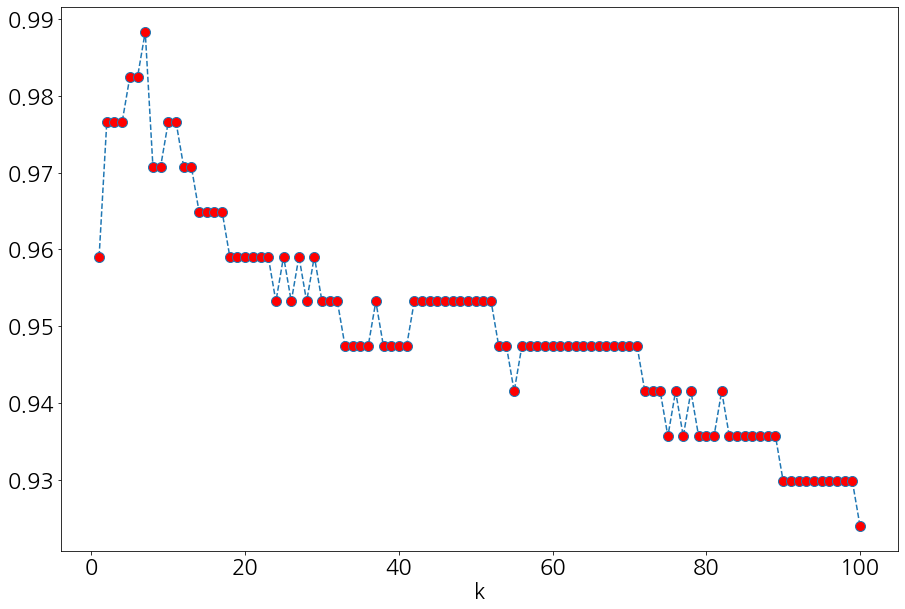

In [62]:
from sklearn.model_selection import train_test_split as tts
from sklearn.neighbors import KNeighborsClassifier as knc
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10)
plt.rcParams.update({'font.size': 22})

acc = []
for k in range(1,101):
    knn_ls = knc(n_neighbors = k)
    knn_ls.fit(X_train, y_train)
    acc.append(knn_ls.score(X_test, y_test))
plt.plot(k_list, acc, linestyle='dashed',marker='o',markerfacecolor='red',markersize=10,)
plt.xlabel("k")
plt.show()

Text(0, 0.5, 'Mean Error')

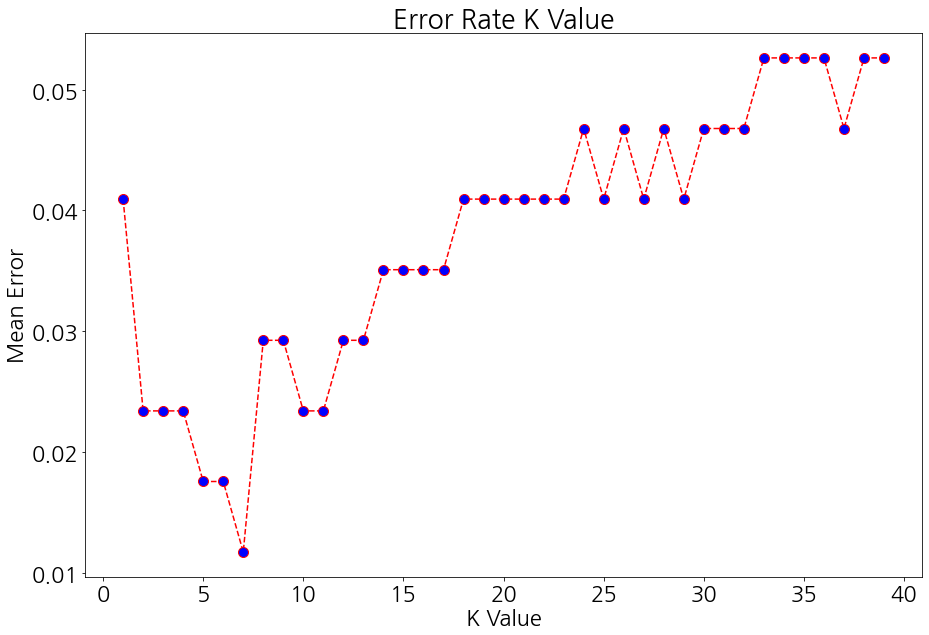

In [60]:
from sklearn.model_selection import train_test_split as tts
from sklearn.neighbors import KNeighborsClassifier as knc
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (15,10)
plt.rcParams.update({'font.size': 22})

error=[]
for i in range(1, 40):
    knn=knc(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i=knn.predict(X_test)
    error.append(np.mean(pred_i != y_test) )

plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [65]:
import seaborn as sb
import pandas as pd
import warnings  # warning 메세지 출력 무시하게 해주는 패키지
warnings.filterwarnings('ignore') # warning 메세지 출력되지 않게 하는 코드 
# 1. csv file ----> dataframe 생성
df=pd.read_csv('wisc_bc_data.csv')

# 2. 결측치를 제거하거나 치환
#df.info() # 타이타닉 데이터 프레임의 자료형을 확인한다. 
#df.shape

# 2-2. 결측치를 확인한다.
pd.set_option('display.max_rows',100) # 컬럼을 다 확인하기 위해 보여주는것을 늘려주는 코드 
df.isnull().sum()

# 2-3. id 컬럼 삭제
rdf=df.drop(['id'], axis=1)

# 3. knn 이므로 범주형 데이터를 숫자형으로 변환 
diag=pd.get_dummies(rdf['diagnosis'], prefix='diagnosis')
rdf=pd.concat([rdf, diag], axis=1)

# 3-3. 범주형 컬럼을 drop 한다.
rdf=rdf.drop(['diagnosis','diagnosis_B'],axis=1)

# 4. 표준화를 진행한다 
# 독립변수와 종속변수로 분리한다.
x=rdf.drop(['diagnosis_M'],axis=1)
y=rdf['diagnosis_M']

# 표준화를 한다.
from sklearn import preprocessing
x=preprocessing.StandardScaler().fit(x).transform(x)

# 5. 데이터를 훈련 데이터/테스트 데이터로 나눈다. 훈련7, 테스트 3 으로 나눈다.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=5)

for j in range(1,21):
    from sklearn.neighbors import KNeighborsClassifier as kc
    knn=kc(n_neighbors=j) # 모델을 생성한다.
    knn.fit(x_train, y_train) # 훈련시킨다

    #테스트 데이터로 예측
    y_hat = knn.predict(x_test)

    #모형의 예측능력을 평가
    from sklearn import metrics
    knn_matrix=metrics.confusion_matrix(y_test,y_hat)
    tn, fp, fn, tp=metrics.confusion_matrix(y_test,y_hat).ravel()
    #print('이원교차표:\n',knn_matrix,'\n')

    #정확도 측정
    from sklearn.metrics import accuracy_score
    accuracy=round(accuracy_score(y_test,y_hat)*100,2)

    print('k값:',j,'의 정확도:',accuracy,'% FN:',fn)

k값: 1 의 정확도: 95.91 % FN: 3
k값: 2 의 정확도: 97.66 % FN: 4
k값: 3 의 정확도: 97.66 % FN: 1
k값: 4 의 정확도: 97.66 % FN: 2
k값: 5 의 정확도: 98.25 % FN: 1
k값: 6 의 정확도: 98.25 % FN: 1
k값: 7 의 정확도: 98.83 % FN: 0
k값: 8 의 정확도: 97.08 % FN: 3
k값: 9 의 정확도: 97.08 % FN: 3
k값: 10 의 정확도: 97.66 % FN: 3
k값: 11 의 정확도: 97.66 % FN: 3
k값: 12 의 정확도: 97.08 % FN: 5
k값: 13 의 정확도: 97.08 % FN: 5
k값: 14 의 정확도: 96.49 % FN: 6
k값: 15 의 정확도: 96.49 % FN: 6
k값: 16 의 정확도: 96.49 % FN: 6
k값: 17 의 정확도: 96.49 % FN: 6
k값: 18 의 정확도: 95.91 % FN: 7
k값: 19 의 정확도: 95.91 % FN: 7
k값: 20 의 정확도: 95.91 % FN: 7


### ※ 문제224. (점심시간 문제) seaborn의 타이타닉 kNN 모델의 적절한 random_state값과 k값이 어떻게 되는지 출력하시오

In [124]:
import pandas as pd
import seaborn as sns
import warnings  
warnings.filterwarnings('ignore') 

df = sns.load_dataset('titanic')
n_df = pd.read_csv('train.csv')
df = pd.concat([df,n_df['Name']],axis=1)
appel = df['Name'].str.split(',').str[1].str.split('.')
df['title'] = appel.str.get(0)

# age_m = pd.DataFrame(round(df.groupby('title')['age'].mean(),1))
# df = pd.merge(df, age_m, on='title',how='left')

rdf = df.drop(['embark_town','deck'],axis=1)
rdf

rdf['age'].fillna(rdf['age'].value_counts(dropna=True).idxmax(), inplace=True) # 최빈값으로 치환
rdf['embarked'].fillna(rdf['embarked'].value_counts(dropna=True).idxmax() , inplace=True ) 

rdf.columns.values

ndf = rdf[['survived','pclass','sex','age','sibsp','parch','embarked']]

gender = pd.get_dummies(ndf.sex)
ndf = pd.concat([ndf, gender],axis=1)

oh_embarked = pd.get_dummies(ndf.embarked, prefix='town')
ndf = pd.concat([ndf, oh_embarked], axis=1)
ndf = ndf.drop(['embarked','sex'],axis=1,)

X = ndf[['pclass','age','sibsp','parch','female','male','town_C','town_Q','town_S']]
y = ndf.survived

from sklearn import preprocessing as ppc
X = ppc.StandardScaler().fit(X).transform(X)
X

acc=[]
for i in range(1,30):
    from sklearn.model_selection import train_test_split as tts
    X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3, random_state=i)

    for j in range(1,30):
        from sklearn.neighbors import KNeighborsClassifier as knc
        knn=knc(n_neighbors=j) 
        knn.fit(X_train, y_train)

        y_hat = knn.predict(X_test)

        from sklearn import metrics
        knn_matrix=metrics.confusion_matrix(y_test,y_hat)
        tn, fp, fn, tp=metrics.confusion_matrix(y_test,y_hat).ravel()

        from sklearn.metrics import accuracy_score
        accuracy=round(accuracy_score(y_test,y_hat)*100,2)
        
        acc.append([i,j,accuracy,fn,fp])       
        print('Random State값',i,'k 값:',j,'의 정확도:',accuracy,'% FP:',fp)

# print(acc)

Random State값 1 k 값: 1 의 정확도: 73.51 % FP: 30
Random State값 1 k 값: 2 의 정확도: 74.25 % FP: 10
Random State값 1 k 값: 3 의 정확도: 77.24 % FP: 21
Random State값 1 k 값: 4 의 정확도: 76.87 % FP: 10
Random State값 1 k 값: 5 의 정확도: 76.12 % FP: 19
Random State값 1 k 값: 6 의 정확도: 76.49 % FP: 16
Random State값 1 k 값: 7 의 정확도: 75.0 % FP: 20
Random State값 1 k 값: 8 의 정확도: 76.49 % FP: 13
Random State값 1 k 값: 9 의 정확도: 76.49 % FP: 15
Random State값 1 k 값: 10 의 정확도: 76.12 % FP: 13
Random State값 1 k 값: 11 의 정확도: 76.49 % FP: 14
Random State값 1 k 값: 12 의 정확도: 76.87 % FP: 12
Random State값 1 k 값: 13 의 정확도: 76.87 % FP: 13
Random State값 1 k 값: 14 의 정확도: 76.87 % FP: 12
Random State값 1 k 값: 15 의 정확도: 76.87 % FP: 13
Random State값 1 k 값: 16 의 정확도: 76.87 % FP: 13
Random State값 1 k 값: 17 의 정확도: 76.87 % FP: 13
Random State값 1 k 값: 18 의 정확도: 76.87 % FP: 13
Random State값 1 k 값: 19 의 정확도: 76.87 % FP: 13
Random State값 1 k 값: 20 의 정확도: 76.87 % FP: 13
Random State값 1 k 값: 21 의 정확도: 76.87 % FP: 13
Random State값 1 k 값: 22 의 정확도: 76.87 % FP: 1

Random State값 7 k 값: 16 의 정확도: 76.87 % FP: 18
Random State값 7 k 값: 17 의 정확도: 76.12 % FP: 20
Random State값 7 k 값: 18 의 정확도: 76.87 % FP: 18
Random State값 7 k 값: 19 의 정확도: 76.49 % FP: 20
Random State값 7 k 값: 20 의 정확도: 76.12 % FP: 19
Random State값 7 k 값: 21 의 정확도: 76.49 % FP: 21
Random State값 7 k 값: 22 의 정확도: 76.12 % FP: 17
Random State값 7 k 값: 23 의 정확도: 75.0 % FP: 22
Random State값 7 k 값: 24 의 정확도: 76.87 % FP: 16
Random State값 7 k 값: 25 의 정확도: 76.49 % FP: 17
Random State값 7 k 값: 26 의 정확도: 76.49 % FP: 17
Random State값 7 k 값: 27 의 정확도: 76.49 % FP: 17
Random State값 7 k 값: 28 의 정확도: 76.12 % FP: 17
Random State값 7 k 값: 29 의 정확도: 76.12 % FP: 19
Random State값 8 k 값: 1 의 정확도: 77.61 % FP: 28
Random State값 8 k 값: 2 의 정확도: 77.99 % FP: 7
Random State값 8 k 값: 3 의 정확도: 81.72 % FP: 15
Random State값 8 k 값: 4 의 정확도: 80.22 % FP: 12
Random State값 8 k 값: 5 의 정확도: 81.34 % FP: 16
Random State값 8 k 값: 6 의 정확도: 81.34 % FP: 11
Random State값 8 k 값: 7 의 정확도: 81.34 % FP: 17
Random State값 8 k 값: 8 의 정확도: 81.72 % FP: 1

Random State값 13 k 값: 28 의 정확도: 79.85 % FP: 19
Random State값 13 k 값: 29 의 정확도: 79.48 % FP: 22
Random State값 14 k 값: 1 의 정확도: 76.87 % FP: 30
Random State값 14 k 값: 2 의 정확도: 79.1 % FP: 13
Random State값 14 k 값: 3 의 정확도: 81.72 % FP: 22
Random State값 14 k 값: 4 의 정확도: 80.6 % FP: 16
Random State값 14 k 값: 5 의 정확도: 81.34 % FP: 21
Random State값 14 k 값: 6 의 정확도: 80.22 % FP: 16
Random State값 14 k 값: 7 의 정확도: 80.22 % FP: 21
Random State값 14 k 값: 8 의 정확도: 80.97 % FP: 18
Random State값 14 k 값: 9 의 정확도: 79.48 % FP: 26
Random State값 14 k 값: 10 의 정확도: 79.48 % FP: 22
Random State값 14 k 값: 11 의 정확도: 80.6 % FP: 24
Random State값 14 k 값: 12 의 정확도: 82.84 % FP: 17
Random State값 14 k 값: 13 의 정확도: 82.46 % FP: 20
Random State값 14 k 값: 14 의 정확도: 82.09 % FP: 18
Random State값 14 k 값: 15 의 정확도: 82.09 % FP: 19
Random State값 14 k 값: 16 의 정확도: 82.46 % FP: 16
Random State값 14 k 값: 17 의 정확도: 82.09 % FP: 19
Random State값 14 k 값: 18 의 정확도: 83.21 % FP: 12
Random State값 14 k 값: 19 의 정확도: 80.6 % FP: 20
Random State값 14 k 값: 20 의

Random State값 20 k 값: 10 의 정확도: 80.22 % FP: 14
Random State값 20 k 값: 11 의 정확도: 81.34 % FP: 15
Random State값 20 k 값: 12 의 정확도: 80.97 % FP: 12
Random State값 20 k 값: 13 의 정확도: 81.72 % FP: 13
Random State값 20 k 값: 14 의 정확도: 82.09 % FP: 12
Random State값 20 k 값: 15 의 정확도: 82.09 % FP: 12
Random State값 20 k 값: 16 의 정확도: 82.09 % FP: 12
Random State값 20 k 값: 17 의 정확도: 81.72 % FP: 13
Random State값 20 k 값: 18 의 정확도: 82.46 % FP: 11
Random State값 20 k 값: 19 의 정확도: 82.46 % FP: 11
Random State값 20 k 값: 20 의 정확도: 81.72 % FP: 11
Random State값 20 k 값: 21 의 정확도: 81.72 % FP: 12
Random State값 20 k 값: 22 의 정확도: 81.72 % FP: 12
Random State값 20 k 값: 23 의 정확도: 81.34 % FP: 13
Random State값 20 k 값: 24 의 정확도: 80.97 % FP: 12
Random State값 20 k 값: 25 의 정확도: 80.97 % FP: 12
Random State값 20 k 값: 26 의 정확도: 80.97 % FP: 11
Random State값 20 k 값: 27 의 정확도: 80.6 % FP: 12
Random State값 20 k 값: 28 의 정확도: 80.6 % FP: 12
Random State값 20 k 값: 29 의 정확도: 80.22 % FP: 13
Random State값 21 k 값: 1 의 정확도: 75.37 % FP: 35
Random State값 21

Random State값 26 k 값: 18 의 정확도: 77.99 % FP: 17
Random State값 26 k 값: 19 의 정확도: 77.61 % FP: 20
Random State값 26 k 값: 20 의 정확도: 77.99 % FP: 17
Random State값 26 k 값: 21 의 정확도: 78.36 % FP: 18
Random State값 26 k 값: 22 의 정확도: 78.36 % FP: 17
Random State값 26 k 값: 23 의 정확도: 78.36 % FP: 18
Random State값 26 k 값: 24 의 정확도: 77.61 % FP: 18
Random State값 26 k 값: 25 의 정확도: 77.61 % FP: 20
Random State값 26 k 값: 26 의 정확도: 77.24 % FP: 18
Random State값 26 k 값: 27 의 정확도: 77.24 % FP: 18
Random State값 26 k 값: 28 의 정확도: 76.87 % FP: 18
Random State값 26 k 값: 29 의 정확도: 76.49 % FP: 19
Random State값 27 k 값: 1 의 정확도: 76.12 % FP: 32
Random State값 27 k 값: 2 의 정확도: 79.85 % FP: 9
Random State값 27 k 값: 3 의 정확도: 81.34 % FP: 17
Random State값 27 k 값: 4 의 정확도: 79.1 % FP: 15
Random State값 27 k 값: 5 의 정확도: 81.34 % FP: 18
Random State값 27 k 값: 6 의 정확도: 81.72 % FP: 13
Random State값 27 k 값: 7 의 정확도: 81.72 % FP: 16
Random State값 27 k 값: 8 의 정확도: 82.46 % FP: 14
Random State값 27 k 값: 9 의 정확도: 82.09 % FP: 17
Random State값 27 k 값: 10

In [125]:
import pandas as pd
acc = pd.DataFrame(acc)
acc[acc[4]==acc[4].min()]

,0,1,2,3,4
30,2,2,76.49,58,5
531,19,10,83.58,39,5
537,19,16,84.33,37,5
539,19,18,83.58,39,5


In [126]:
acc[acc[2]==acc[2].max()]

,0,1,2,3,4
101,4,15,85.45,31,8


### <b>■ 정확도외에 같이 챙겨야할 또다른 성능 척도</b>
    1. 정밀도
$$ 정밀도 = {{TP}\over {TP + FP}}$$
<center> True로 예측한 분석 대상 중에서 실제 값이 True인 비율<br>
    모형의 정밀도가 높다는 것은 <b>False Positive(실제 False를 True로 잘못예측, 암으로 예측 -> 실제로는 암이 아닌 것)</b><br>
    오류가 작다는 뜻</center>
    
    2. 재현율
$$ 재현율 = {{TP}\over {TP+FN}} $$
<center> 실제 값이 true 인 분석 대상 중에서 true로 예측하여 모형이 적중한 비율<br>
    모형의 완정성을 나타내는 지표<br>
    <b>재현율이 높다는 것은 False Negative(암이 아니라고 예측 -> 실제로는 암) 오류가 작다는 것</b></center>
    
    3. 특이도
    4. 민감도
    5. F1 지표(f1-score)
$$ {{2 \times ( 정밀도 \times 재현율 )}\over {정밀도 + 재현율}}$$
<center> 정밀도와 재현율이 균등하게 반영될 수 있도록 정밀도와 재현율의 조화평균을 계산한 값<br>
    조형의 예측력을 종합적으로 평가하는 지표<br>
    <b>이 값이 높을 수록 모형의 예측력이 높다</b></center>

In [127]:
# F1-Score를 확인
from sklearn import metrics
y_true = [0,1,0,1] # 0: 사망자, 1: 생존자
y_pred = [1,1,1,0] # 0: 사망자, 1: 생존자

res = metrics.confusion_matrix(y_true, y_pred)
tn, fp, fn, tp = metrics.confusion_matrix(y_true, y_pred).ravel()
print(res)
f1_report = metrics.classification_report(y_true, y_pred)
print(f1_report)

[[0 2]
 [1 1]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      0.50      0.40         2

    accuracy                           0.25         4
   macro avg       0.17      0.25      0.20         4
weighted avg       0.17      0.25      0.20         4



### ※ 문제225. seaborn의 타이타닉 코드 맨 아래에 f1-score를 출력하는 코드를 추가하고 확인하시오

In [129]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset('titanic')
n_df = pd.read_csv('train.csv')
df = pd.concat([df,n_df['Name']],axis=1)
appel = df['Name'].str.split(',').str[1].str.split('.')
df['title'] = appel.str.get(0)

# age_m = pd.DataFrame(round(df.groupby('title')['age'].mean(),1))
# df = pd.merge(df, age_m, on='title',how='left')

rdf = df.drop(['embark_town','deck'],axis=1)
rdf

rdf['age'].fillna(rdf['age'].value_counts(dropna=True).idxmax(), inplace=True) # 최빈값으로 치환
rdf['embarked'].fillna(rdf['embarked'].value_counts(dropna=True).idxmax() , inplace=True ) 

rdf.columns.values

ndf = rdf[['survived','pclass','sex','age','sibsp','parch','embarked']]

gender = pd.get_dummies(ndf.sex)
ndf = pd.concat([ndf, gender],axis=1)

oh_embarked = pd.get_dummies(ndf.embarked, prefix='town')
ndf = pd.concat([ndf, oh_embarked], axis=1)
ndf = ndf.drop(['embarked','sex'],axis=1,)

X = ndf[['pclass','age','sibsp','parch','female','male','town_C','town_Q','town_S']]
y = ndf.survived

from sklearn import preprocessing as ppc
X = ppc.StandardScaler().fit(X).transform(X)
X

from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3, random_state=4)

from sklearn.neighbors import KNeighborsClassifier as knc
knn = knc(n_neighbors=15)
knn.fit(X_train, y_train)

y_hat = knn.predict(X_test)

from sklearn import metrics
knn_matrix = metrics.confusion_matrix(y_test, y_hat)
print(knn_matrix)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score( y_test, y_hat)
print(accuracy)

f1_report = metrics.classification_report(y_test, y_hat)
print(f1_report)

[[170   8]
 [ 31  59]]
0.8544776119402985
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       178
           1       0.88      0.66      0.75        90

    accuracy                           0.85       268
   macro avg       0.86      0.81      0.82       268
weighted avg       0.86      0.85      0.85       268

